In [1]:
import nltk
import re
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_csv(r"/kaggle/input/dataset/appl_1_amazon_pc.csv")
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1


In [5]:
df.loc[df['product_title'] == 'Fire HD 7, 7" HD Display, Wi-Fi, 8 GB']

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30841,US,44834233,R366C7ARIWLN7R,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,3720,3875,N,Y,A great upgrade for me from an older Kindle Fire!,[[VIDEOID:moP3B6GS5RL8LY]]I purchased the orig...,2014-10-03,1
30842,US,13376158,R35PL0AOCUXLU9,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,2716,2849,N,Y,Great Value for $139,I'm writing this review with the benefit of be...,2014-10-03,1
30843,US,40485963,R18ZJVY86AUFII,B00KC6XV58,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1525,1629,N,Y,Even grandma has it figured out!,"I purchased this Kindle for my grandma, becaus...",2014-10-03,1
30844,US,33485035,R36QVLQXMCZRSJ,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,143,163,N,Y,The Honda Accord of Tablets,I bought my tablet Fire HD 7 at Best Buy on th...,2014-10-03,1


In [6]:
df.isnull().sum() #no null values

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
sentiment            0
dtype: int64

In [7]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'sentiment'],
      dtype='object')

In [8]:
df.shape

(30846, 16)

In [9]:
df.loc[(df['star_rating'] >= 4 ) & (df['sentiment'] == 0)]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment


In [10]:
data = df.loc[:, ['sentiment', 'review_body']]
data.head()

,sentiment,review_body
0,1,Great love it
1,0,Lots of ads<br />Slow processing speed<br />Oc...
2,1,Excellent unit. The versatility of this table...
3,1,I bought this on Amazon Prime so I ended up bu...
4,1,All Amazon products continue to meet my expect...


In [11]:
data.dtypes

sentiment       int64
review_body    object
dtype: object

In [12]:
data['review_body'] = data['review_body'].astype(str)

In [13]:
#function to remove html from the text
def remove_HTML(raw_text):
    
    clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text()
    
    return clean_HTML
    
    

In [14]:
#‘np.vectorize()’ is used because it is much more faster than the 
#conventional for loops when working on datasets of medium to large sizes.
data['review_tidy'] = np.vectorize(remove_HTML)(data['review_body'])

/tmp/ipykernel_28/684879159.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text()


In [15]:
#Removing Punctuation, Numbers, and Special Characters
data['review_tidy'] = data['review_body'].str.replace("[^a-zA-Z]", " ") 
data.head()

/tmp/ipykernel_28/1217890797.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['review_tidy'] = data['review_body'].str.replace("[^a-zA-Z]", " ")


,sentiment,review_body,review_tidy
0,1,Great love it,Great love it
1,0,Lots of ads<br />Slow processing speed<br />Oc...,Lots of ads br Slow processing speed br Oc...
2,1,Excellent unit. The versatility of this table...,Excellent unit The versatility of this table...
3,1,I bought this on Amazon Prime so I ended up bu...,I bought this on Amazon Prime so I ended up bu...
4,1,All Amazon products continue to meet my expect...,All Amazon products continue to meet my expect...


In [16]:
#Removing short words
data['review_tidy'] = data['review_tidy'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
data.head()

,sentiment,review_body,review_tidy
0,1,Great love it,Great love
1,0,Lots of ads<br />Slow processing speed<br />Oc...,Lots Slow processing speed Occasionally shuts ...
2,1,Excellent unit. The versatility of this table...,Excellent unit versatility this tablet besides...
3,1,I bought this on Amazon Prime so I ended up bu...,bought this Amazon Prime ended buying camera o...
4,1,All Amazon products continue to meet my expect...,Amazon products continue meet expectations


In [17]:
#Removing Stop Words
stops = set(stopwords.words("english"))
data['review_tidy'] = data['review_tidy'].apply(lambda x: ' '.join([w for w in x.split() if not w in stops]))
data.head()

,sentiment,review_body,review_tidy
0,1,Great love it,Great love
1,0,Lots of ads<br />Slow processing speed<br />Oc...,Lots Slow processing speed Occasionally shuts ...
2,1,Excellent unit. The versatility of this table...,Excellent unit versatility tablet besides comp...
3,1,I bought this on Amazon Prime so I ended up bu...,bought Amazon Prime ended buying camera okay l...
4,1,All Amazon products continue to meet my expect...,Amazon products continue meet expectations


In [18]:
#Tokenization
tokenized_review = data['review_tidy'].apply(lambda x : x.split())
tokenized_review.head()

0                                        [Great, love]
1    [Lots, Slow, processing, speed, Occasionally, ...
2    [Excellent, unit, versatility, tablet, besides...
3    [bought, Amazon, Prime, ended, buying, camera,...
4     [Amazon, products, continue, meet, expectations]
Name: review_tidy, dtype: object

In [19]:
#Stemming
from nltk import PorterStemmer
ps = PorterStemmer()

tokenized_review = tokenized_review.apply(lambda x: [ps.stem(w) for w in x])

tokenized_review.head()

0                                        [great, love]
1    [lot, slow, process, speed, occasion, shut, ap...
2    [excel, unit, versatil, tablet, besid, competi...
3    [bought, amazon, prime, end, buy, camera, okay...
4             [amazon, product, continu, meet, expect]
Name: review_tidy, dtype: object

In [20]:
#now let's stitch these tokens back together
for i in range(len(tokenized_review)):
    tokenized_review[i] = ' '.join(tokenized_review[i])
    
data['review_tidy'] = tokenized_review
data.head()
    

,sentiment,review_body,review_tidy
0,1,Great love it,great love
1,0,Lots of ads<br />Slow processing speed<br />Oc...,lot slow process speed occasion shut app wifi ...
2,1,Excellent unit. The versatility of this table...,excel unit versatil tablet besid competit pric...
3,1,I bought this on Amazon Prime so I ended up bu...,bought amazon prime end buy camera okay love e...
4,1,All Amazon products continue to meet my expect...,amazon product continu meet expect


Visualization from Reviews


In [21]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import urllib
import requests

In [22]:
all_words_positive = ' '.join(text for text in data['review_tidy'].loc[data['sentiment'] == 1])

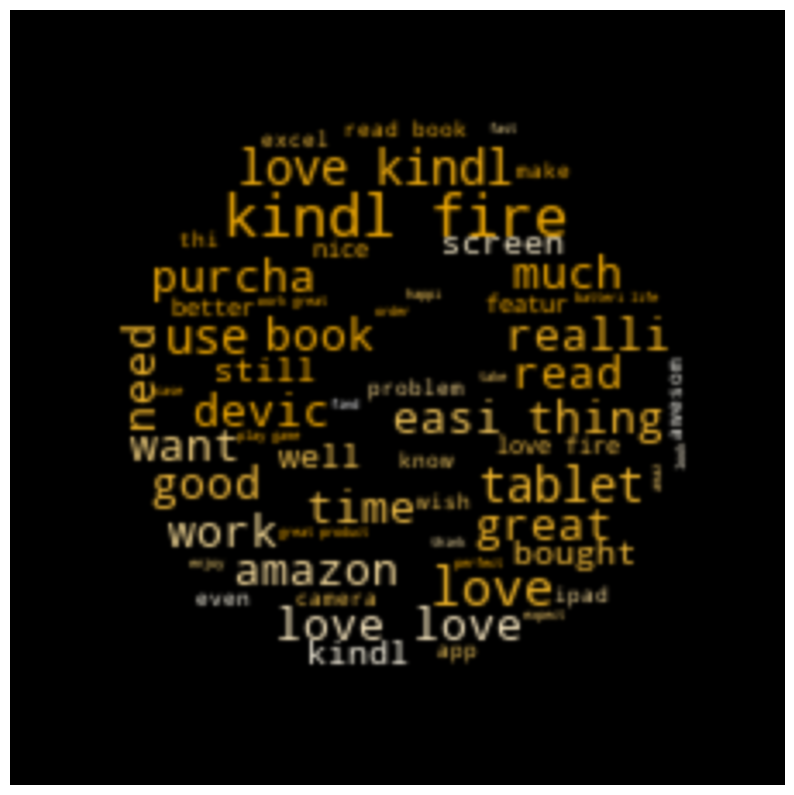

In [23]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTMkHv0BcHb7ydh3jo0JAM7um63avup7i2eFA&usqp=CAU', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

# Size of the image generated 
plt.figure(figsize=(10,15))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

In [24]:
all_words_negative = ' '.join(text for text in data['review_tidy'].loc[data['sentiment'] == 0])

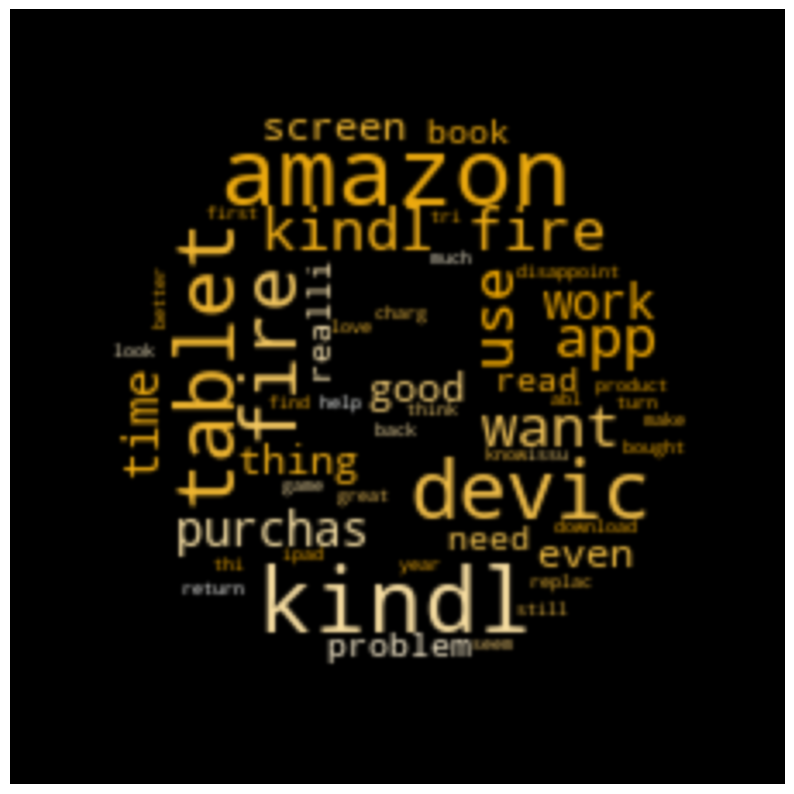

In [25]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTMkHv0BcHb7ydh3jo0JAM7um63avup7i2eFA&usqp=CAU', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()


In [26]:
#most common words bar plots
#some more EDA part

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(max_df = 0.9)
tfidf = tfidf_vec.fit_transform(data['review_tidy'])

In [31]:

label = data['sentiment']



In [32]:
from sklearn.model_selection import train_test_split
x_train_tf ,x_valid_tf ,y_train_tf ,y_valid_tf = train_test_split(tfidf ,label, test_size = 0.3, random_state = 42)


In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [34]:
def evaluation(true, predict):
    

SyntaxError: incomplete input (36048815.py, line 2)

In [35]:
import optuna
from optuna.samplers import TPESampler
from sklearn.metrics import f1_score

In [36]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train_tf, y_train_tf)

f1_score(y_valid_tf, log_reg.predict(x_valid_tf))


0.9426991706458909

In [37]:
f1_score(test_label, log_reg.predict(test_tfidf))

0.9370267038660821

In [45]:
def objective_svm(trial):
    kernel = trial.suggest_categorical('kernel', ['poly', 'rbf'])
    C = trial.suggest_float('C', 0.01, 100, log = True)
    gamma = trial.suggest_float('gamma', 0.01, 100, log = True)
    model = SVC(kernel = kernel, C = C, gamma = gamma, random_state = 42)
    model.fit(x_train_tf, y_train_tf)
    y_pred_tf = model.predict(x_valid_tf)
    return f1_score(y_valid_tf, y_pred_tf)

In [44]:
sampler = TPESampler(seed = 1)
study = optuna.create_study(direction = 'maximize', sampler = sampler)
study.optimize(objective_svm, n_trials = 40)

[I 2023-08-26 11:40:48,681] A new study created in memory with name: no-name-fc5c03f0-8d06-4e36-888b-2b3215606aba
[I 2023-08-26 11:41:27,797] Trial 0 finished with value: 0.9098833784898103 and parameters: {'kernel': 'rbf', 'C': 0.010010539860510492, 'gamma': 0.16193110912440742}. Best is trial 0 with value: 0.9098833784898103.
[I 2023-08-26 11:41:59,154] Trial 1 finished with value: 0.9098833784898103 and parameters: {'kernel': 'poly', 'C': 0.0555956542671257, 'gamma': 0.24112537061475747}. Best is trial 0 with value: 0.9098833784898103.
[I 2023-08-26 11:44:28,508] Trial 2 finished with value: 0.9101408284720994 and parameters: {'kernel': 'rbf', 'C': 0.47509237210306143, 'gamma': 5.5065298979459945}. Best is trial 2 with value: 0.9101408284720994.
[I 2023-08-26 11:46:14,055] Trial 3 finished with value: 0.9098833784898103 and parameters: {'kernel': 'rbf', 'C': 0.01286916510781503, 'gamma': 4.806954824961602}. Best is trial 2 with value: 0.9101408284720994.
[I 2023-08-26 11:46:52,551] 

In [40]:
def objective_xg(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 100, 1000)
    learning_rate = trail.suggest_float('learning_rate', 0.001, 0.1, log = True)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    
    model = XGBClassifier(n_estimators = n_estimators, learning_rate = learning_rate, max_depth = max_depth, random_state = 42)
    model.fit(x_train_tf, y_train_tf)
    y_pred_tf = model.predict(x_valid_tf)
    return f1_score(y_valid_tf, y_pred_tf)

In [42]:
sampler = TPESampler(seed = 1)
study = optuna.create_study(direction = 'maximize', sampler = sampler)
study.optimize(objective_svm, n_trials = 40)

[I 2023-08-26 09:42:05,734] A new study created in memory with name: no-name-b67b12da-a0a5-403b-8bf1-94275546f650
[I 2023-08-26 09:42:44,174] Trial 0 finished with value: 0.9098833784898103 and parameters: {'kernel': 'rbf', 'C': 0.010010539860510492, 'gamma': 0.16193110912440742}. Best is trial 0 with value: 0.9098833784898103.
[I 2023-08-26 09:43:15,066] Trial 1 finished with value: 0.9098833784898103 and parameters: {'kernel': 'poly', 'C': 0.0555956542671257, 'gamma': 0.24112537061475747}. Best is trial 0 with value: 0.9098833784898103.
[I 2023-08-26 09:45:43,682] Trial 2 finished with value: 0.9101408284720994 and parameters: {'kernel': 'rbf', 'C': 0.47509237210306143, 'gamma': 5.5065298979459945}. Best is trial 2 with value: 0.9101408284720994.
[I 2023-08-26 09:47:28,148] Trial 3 finished with value: 0.9098833784898103 and parameters: {'kernel': 'rbf', 'C': 0.01286916510781503, 'gamma': 4.806954824961602}. Best is trial 2 with value: 0.9101408284720994.
[I 2023-08-26 09:48:05,900] 